# More Futures

### BUSI 722: Data-Driven Finance II
### Kerry Back, Rice University

### Some cash-settled contracts

- [S&P 500](https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.contractSpecs.html)
- [Fed Funds](https://www.cmegroup.com/markets/interest-rates/stirs/30-day-federal-fund.contractSpecs.html)
- [Crack Spread](https://www.cmegroup.com/markets/energy/refined-products/rbob-crack-spread-swap-futures.contractSpecs.html)

## Slopes of Forward Curves

- Forward curve (or futures curve) = futures price as a function of maturity
- Sometimes upward sloping (prices are higher at later maturities)
- Sometimes downward sloping (prices are lower at later maturities)
- Why?
- [Histories of forward curves](https://learn-investments.rice-business.org/futures-options/forward-curve)

### Gold futures

- Can create "synthetic" gold futures:
  - borrow money, buy gold spot and store it
  - later pay today's spot price + interest and have gold
- Futures price should equal today's spot price + interest
  - Anyone can create synthetic futures and sell actual futures if synthetic futures is cheaper
  - People storing gold can "sell" synthetic futures and buy actual if synthetic is more expensive
- [Gold futures prices](https://www.cmegroup.com/markets/metals/precious/gold.quotes.html#venue=globex)

### Cost of carry and convenience yield

- Cost of carry = cost of owning physical = foregone interest + storage costs
- Convenience yield = benefit of owning physical = dividends and/or profits from temporary product shortages

### Contango and backwardation

- Contango = upward sloping forward curve (futures > spot)
- Cost of carry > convenience yield $\Rightarrow$ contango (like gold)
- Backwardation = downward sloping (spot > futures)
- Convenience yield > cost of carry $\Rightarrow$ backwardation (like peso)

### Currencies

- Cost of carry for currency = U.S. interest rate
- Convenience yield for currency = foreign interest rate
- Foreign rate > U.S. rate $\Rightarrow$ backwardation.  See [peso futures](https://www.cmegroup.com/markets/fx/emerging-market/mexican-peso.html#venue=globex).
- Foreign rate < U.S. rate $\Rightarrow$ contango.  See [euro futures](https://www.cmegroup.com/markets/fx/g10/euro-fx.quotes.html#venue=globex).

### Financials

- Cost of carry for financials = U.S. interest rate
- Convenience yield = dividends (for stock index futures), coupons (for T-bond futures), ...
- Dividends/coupons > interest rates $\Rightarrow$ backwardation
- Dividends/coupons < interest rates $\Rightarrow$ contango
- [S&P 500 futures prices](https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.quotes.html#venue=globex)

### Commodities (agriculture, energy)

- Commodities can have high cost of carry (storage) and sometimes high convenience yields
- Sometimes in contango and sometimes in backwardation
- Seasonal commodities can be in neither (cyclical)
  - [Natural gas](https://www.cmegroup.com/markets/energy/natural-gas/natural-gas.quotes.html#venue=globex) prices high in winters
  - Gasoline prices high in summers
  - Agricultural high before harvest and low after harvest

## Futures roll and expectations hypothesis

### Futures roll

- Think of the forward curve as in terms of time to maturity
  - Futures price for 1 month to maturity, 2 months, ...
- Suppose you buy a futures that is in contango, and the forward curve never changes.  Do you make or lose money?
- Maybe sell contango futures and buy backwardation futures?

### Illustration

- Contract that is 12 months out
- Follow the price of the contract as time passes
- If the forward curve doesn't change, the futures price will 
  - fall in a contango market and 
  - rise in a backwardation market

In [8]:
import plotly.express as px
import pandas as pd
import numpy as np

x = np.arange(0, 24.25, 0.25)

df = None 
for i in range(49):
    y = 40 + 10 * (np.log(1 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 75
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/contango_roll.html")


In [9]:
df = None 
for i in range(49):
    y = 40 - 10 * (np.log(1 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 75
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/backwardation_roll.html")

[Futures roll in a contango market](images/contango_roll.html)

[Futures roll in a backwardation market](images/backwardation_roll.html)

But maybe the forward curve tends to rise over time in contango markets and fall over time in backwardation markets?

### Expectations hypothesis

- Today's futures price should be related to the spot price people expect the asset to trade at in the future, because you could buy (sell) futures now and sell (buy) spot later.
  - Example: suppose we can buy December corn now at 5.00 per bushel
  - If we expect corn to sell for 4.00 per bushel in December, then maybe we should all be selling 5.00 corn now.  Spot-futures convergence implies 1.00 profit if corn is 4.00 in December.
  - If there are no expected profits of this sort, then we must expect corn to sell for 5.00 in December.
- The expectations hypothesis is that the futures price represents today's expectation of the future spot price.

In [10]:
df = None 
for i in range(49):
    y = 40 + 10 * (np.log(1 + i/4 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/contango_expectations.html")

In [11]:
df = None 
for i in range(49):
    y = 40 - 10 * (np.log(1 + i/4 + x) - np.log(12))
    month = (i/4)*np.ones(len(x))
    size = np.ones(len(x))
    size[48-i] = 10
    d = pd.DataFrame(dict(x=x, y=y, month=month, size=size))
    df = pd.concat((df, d))
fig = px.scatter(df, x="x", y="y", animation_frame="month", size="size")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300
fig.update_layout(
    font_size=14,
    yaxis=dict(
        range=(0, 80),
        title="Futures Price",
        title_font_size=16,
    ),
    xaxis=dict(
        title="Months to Maturity",
        title_font_size=16,
        tickvals=np.arange(0, 26, 2)
    ),
    template="plotly_dark"
)
fig.write_html("images/backwardation_expectations.html")

[Expectations hypothesis in a contango market](images/contango_expectations.html)

[Expectations hypothesis in a backwardation market](images/backwardation_expectations.html)

- But there could be risk premia.
- Example: more corn hedging by farmers than by grain processors
  - Speculators are needed to buy corn futures from farmers
  - Expect compensation for risk
  - Implies futures price < expected future spot

### Currencies

- The data indicate that selling contango currency futures and buying backwardation currency futures is profitable on average.
  - Long futures $\sim$ long synthetic futures = borrowing dollars and buying currency
  - Short futures $\sim$ short synthetic futures = borrowing foreign currency and buying dollars
- Selling contango futures means selling (borrowing) high interest rate or low interest rate currencies?
- Buying backwardation means buying (investing in) high interest rate or low interest rate currencies?

## Futures-based ETFs

- You can buy or sell futures through a stock broker by buying ETFs.
- Example: USO holds oil futures
- To set up a 100 million dollar ETF:
  - Raise 100 million cash.  
  - Buy (or sell) enough futures contracts so that #contracts $\times$ futures price = 100 million
  - Deposit 10 million as T-bills for margin
  - Buy other higher yielding liquid safe assets with other 90 million
  - Gain/loss each day = 100 million x (% change in futures price + interest).

In [12]:
import pandas as pd
from pandas_datareader import DataReader as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

spot = pdr("DCOILWTICO", "fred", start=1990)
uso = yf.download("USO", start=1970, progress=False)["Adj Close"]
spot = spot.reindex(uso.index)

### Spot (front month futures) price of oil

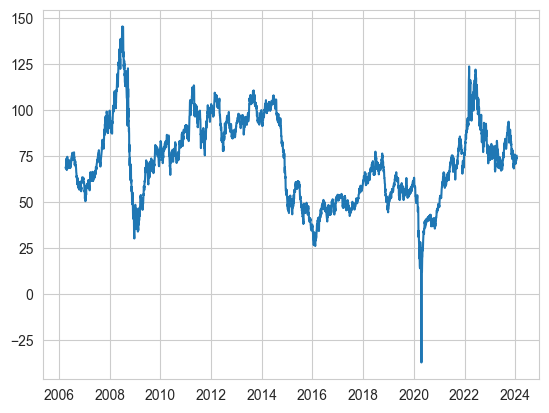

In [13]:
plt.plot(spot)
plt.show()

### Comparing oil prices to USO returns

- Calculate what 1 dollar of oil in 2006 is worth now 
- Calculate what 1 dollar in USO in 2006 would have grown to

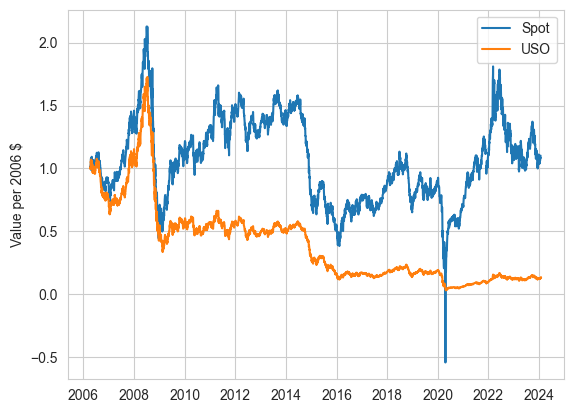

In [14]:
spot = spot/spot.iloc[0]
uso = uso/uso.iloc[0]
plt.plot(spot, label="Spot")
plt.plot(uso, label="USO")
plt.ylabel("Value per 2006 $")
plt.legend()
plt.show()